In [2]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [77]:
df = pd.read_csv(r'C:\Users\justi\Downloads\movies.csv')

In [62]:
#Look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [78]:
#Cleaning and preparing data 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


In [79]:
#Ok, we'll drop the rows w/ missing data for our purposes here
df = df.dropna() 

In [80]:
#identifying our column datatypes and changing if needed
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [81]:
df['budget']= df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [82]:
df['yearcorrect']= df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [83]:
df=df.sort_values(by=['gross'],inplace=False, ascending=False)

In [84]:
pd.set_option('display.max_rows',None)

In [97]:
#dropping duplicates
df.drop_duplicates()
df.drop(columns='released')

name  rating  genre  year  score      votes  director  writer  star  \
5445   386       5      0  2009    7.8  1100000.0       785    1263  1534   
7445   388       5      0  2019    8.4   903000.0       105     513  1470   
3045  4909       5      6  1997    7.8  1100000.0       785    1263  1073   
6663  3643       5      0  2015    7.8   876000.0       768    1806   356   
7244   389       5      0  2018    8.4   897000.0       105     513  1470   
7480  4388       4      2  2019    6.9   222000.0      1012    1361   457   
6653  2117       5      0  2015    7.0   593000.0       335    2523   293   
6043  3878       5      0  2012    8.0  1300000.0      1060    1646  1470   
6646  1541       5      0  2015    7.1   370000.0       809     481  1785   
7494  1530       4      2  2019    6.8   148000.0       277    1383  1036   
6644   387       5      0  2015    7.3   777000.0      1060    1646  1470   
7247   567       5      0  2018    7.3   661000.0      1716    2687   260   
5845  1731       5      1  2011    8.1   790000.0       452    2862   379   
7075  3644       5      0  2017    7.0   581000.0      1589    2487   356   
7271  2118       5      0  2018    6.2   277000.0       764     777   293   
6262  1529       4      2  2013    7.4   585000.0       277    1383  1036   
7072   477       4      7  2017    7.1   283000.0       155    2822   533   
7281  1966       4      2  2018    7.6   263000.0       193     327   344   
7055  4119       5      0  2017    6.6   214000.0       567    1013  1785   
6244  2014       5      0  2013    7.1   779000.0      1767     837  1470   
6688  2545       4      2  2015    6.4   218000.0      1144     362  1542   
6846   750       5      0  2016    7.8   694000.0       105     513   283   
7250   343       5      0  2018    6.9   404000.0       809     699   759   
4245  4407       5      0  2003    8.9  1700000.0      1520    1238   497   
7458  3595       5      0  2019    7.5   359000.0      1019     479  1738   
7456   755       5      0  2019    6.8   478000.0        96     182   208   
5878  4950       5      0  2011    6.2   390000.0      1302     886  1610   
6059  3498       5      0  2012    7.7   642000.0      1732    2221   373   
6494  4949       5      0  2014    5.6   302000.0      1302     886  1161   
2448  4388       1      2  1994    8.5   970000.0      1685    1206  1187   
6047  4048       5      0  2012    8.4  1600000.0       317    1606   297   
7463  3640       5      0  2019    6.5   394000.0       768     489   356   
7450  2091       6      5  2019    8.4  1000000.0      1937    2998   844   
7488  4936       1      2  2019    7.7   217000.0      1052    1525  1735   
5685  4935       1      2  2010    8.2   776000.0      1162    1525  1735   
4852  2985       5      0  2006    7.3   668000.0       674    2927   889   
6869  3260       5      0  2016    7.8   572000.0       615     492   555   
7481   206       4      1  2019    6.9   239000.0       705    1468  1812   
5860  2988       5      0  2011    6.6   492000.0      1635    2927   889   
7140  1102       4      2  2017    6.3   119000.0      1144     524  1644   
2245  2115       5      0  1993    8.1   894000.0      1859    2070  1529   
6908  1411       4      2  2016    7.3   250000.0        81     153   512   
3451  3637       4      0  1999    6.5   748000.0       653    1046   550   
5667   215       4      1  2010    6.4   392000.0      1918    1849  1216   
6863  5329       4      2  2016    8.0   450000.0       239     390   613   
6045  4240       5      1  2012    7.8   773000.0      1520     967  1166   
3843  1736       4      1  2001    7.6   685000.0       280    1236   379   
5243  4047       5      0  2008    9.0  2400000.0       317    1606   297   
6311  1101       4      2  2013    7.3   377000.0      1556     524  1644   
6905  4322       4      1  2016    7.4   264000.0      1012    1671  1300   
7051  2107       5      0  2017    6.9   336000.0       778     479   472   
64

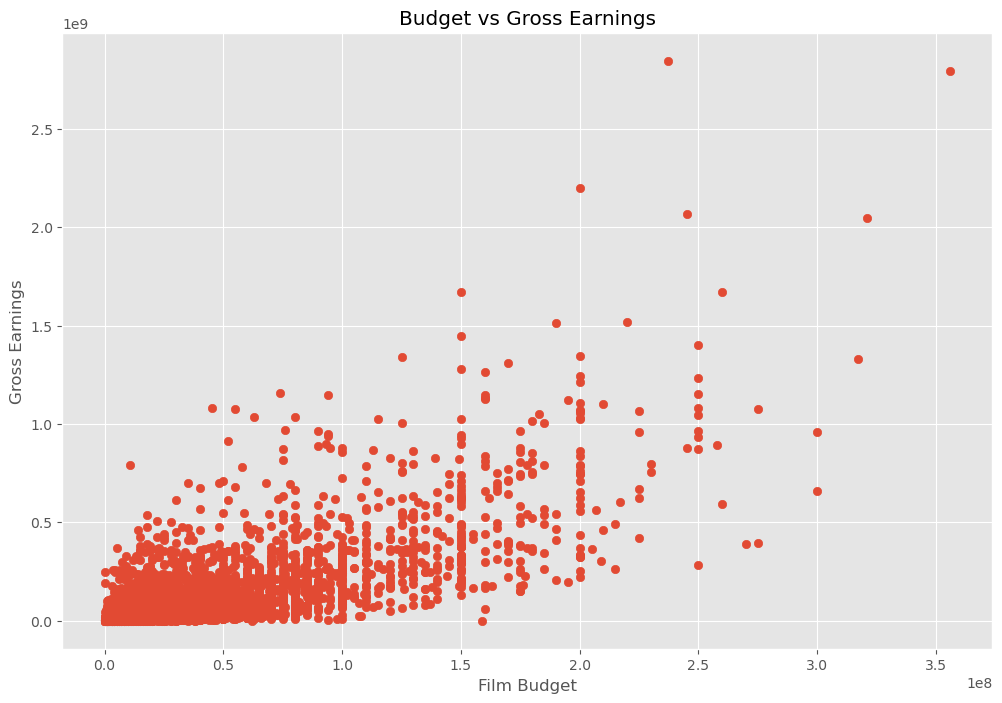

In [72]:
#building scatterplot

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Film Budget')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

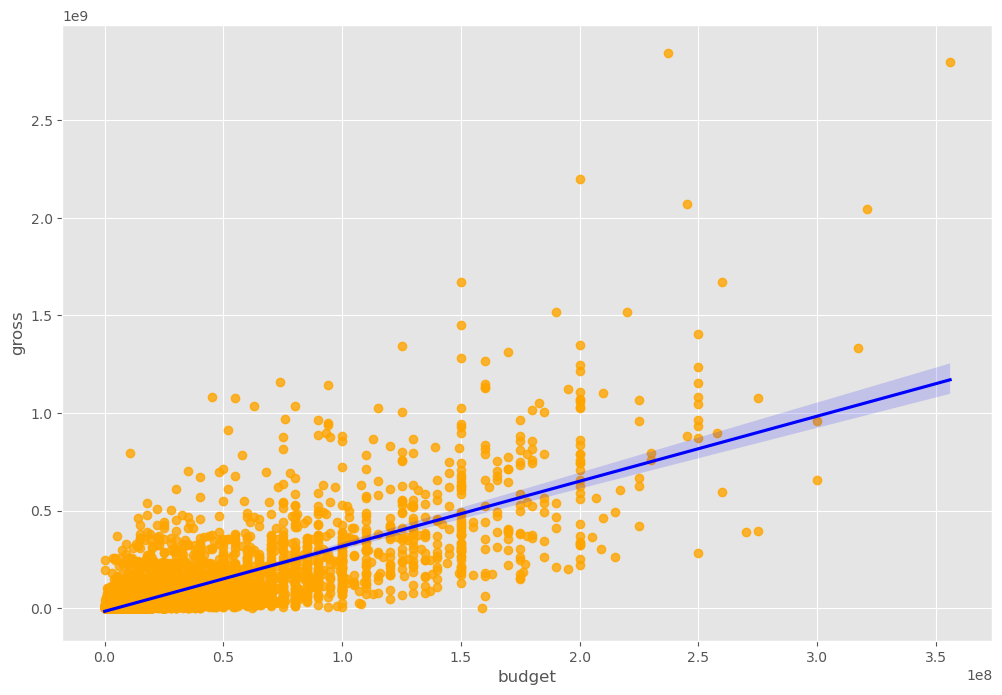

In [73]:
#building a regression line for budget and gross earnings

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"orange"},line_kws={"color":"blue"})

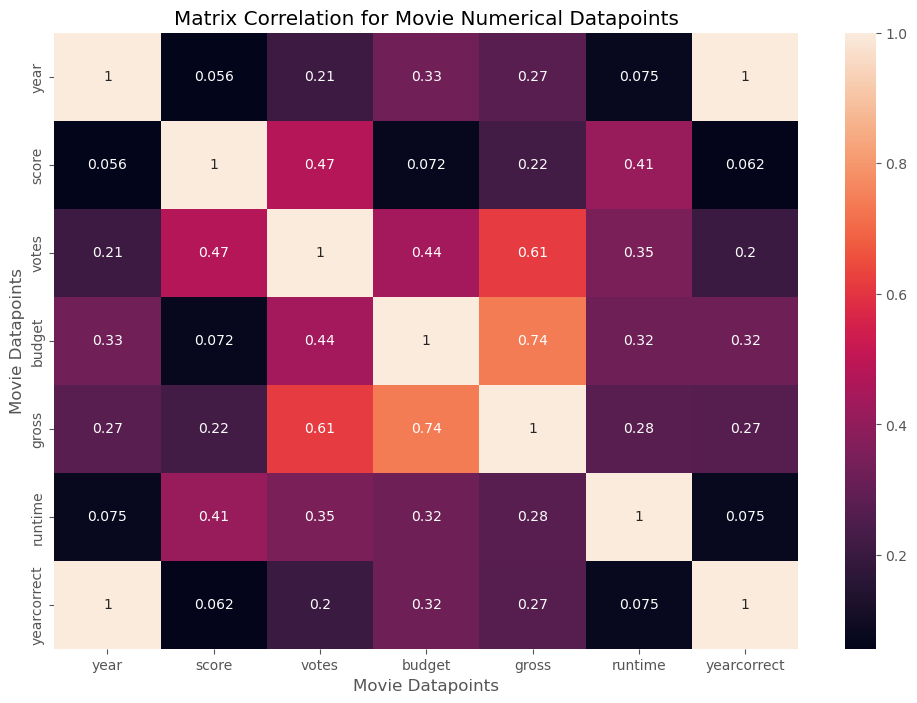

In [74]:
#Looking at the correlation
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Matrix Correlation for Movie Numerical Datapoints')

plt.xlabel('Movie Datapoints')

plt.ylabel('Movie Datapoints')

plt.show()

In [101]:
#finding correlation between company and other non-numeric fields

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes

df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0         2009  
7445  1470       47  356000000  2797501328      983    181.0         2019  
3045  1073       47  200000000  2201647264     1382    194.0         1997  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018

In [100]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0         2009  
7445  1470       47  356000000  2797501328      983    181.0         2019  
3045  1073       47  200000000  2201647264     1382    194.0         1997  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018

<function matplotlib.pyplot.show(close=None, block=None)>

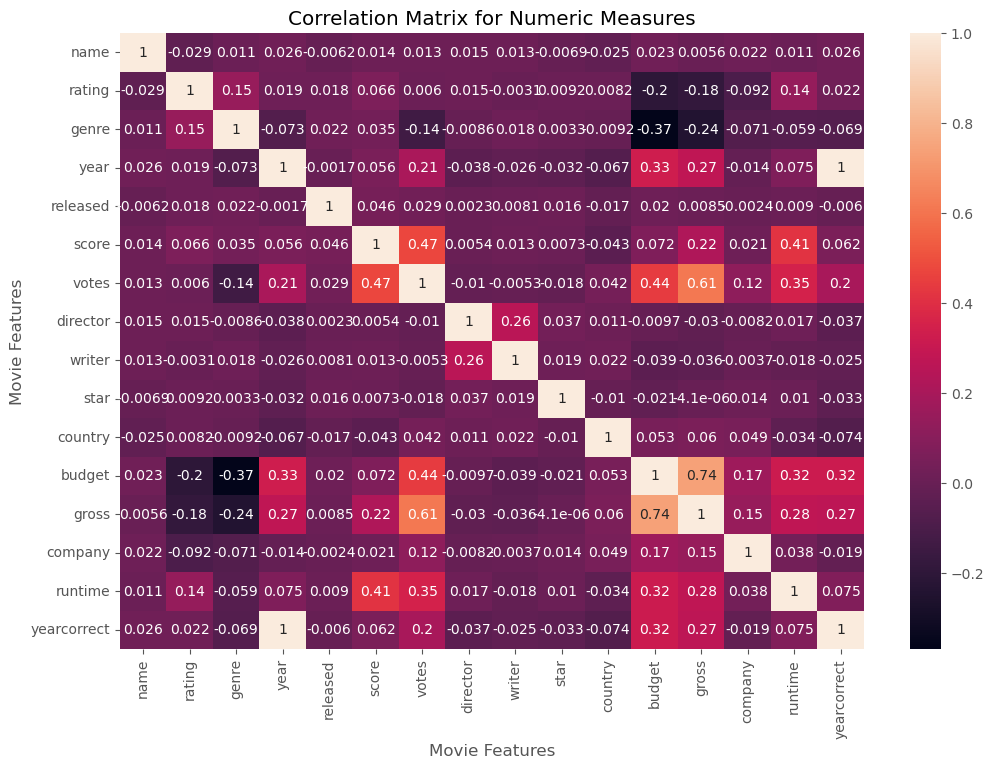

In [99]:
new_correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(new_correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Measures')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [90]:
#Looking at it a different way
corr_matrix=df_numerized.corr()

corr_pairs=corr_matrix.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [91]:
#sorting correlation pairs
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [95]:
#filtering correlation pairs >0.5 and != 1
high_corr=sorted_pairs[(sorted_pairs>0.5)&(sorted_pairs!=1)]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
dtype: float64